# Second worksheet

Welcome to the second worksheet in the Image Understanding Lab. Today we will look at the Fuorier transformation of images.

# Imports

In [6]:
import cv2

import numpy as np

from matplotlib import pyplot as plt

# Task 1, 1D Fourier Transform

a) Given the following signals, generate the Fourier transform for them. For this, look at the functions **[numpy.fft.fft](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft.html)**, **[numpy.fft.fftshift](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)**, **[numpy.fft.fftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftfreq.html)**. Plot the time signal and spectrum against each other.

(-12.0, 12.0)

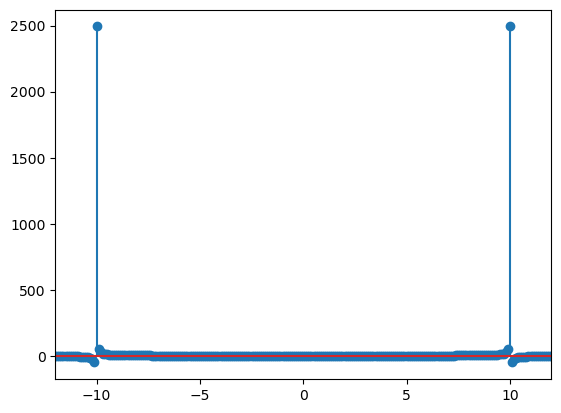

In [7]:
N = 5000 # Number of sampling steps <- specifies how long we look at the signal.
T = 1.0/500 # Sampling frequency <- specifies how many times we sample per second.
f = 10 # Frequency of the signal <- specifies how many periods we have in the signal.


x = np.linspace(0.0,N*T,N)
y = np.cos(2.0*np.pi*f*x)

### add code for fouriertransform here ###
# have a look at the following methods:
# fft(), fftshift

yf = np.fft.fft(y)
yf = np.fft.fftshift(yf)

xf = np.fft.fftfreq(N,T)
xf = np.fft.fftshift(xf)
plt.stem(xf,yf.real)

plt.xlim(-12,12)

### hint: for better visualization, you need to limit the x-axis to -4 to 4

b) Calculate also the spectrum of the following signal. What differences do you notice? Generate a plot as above.

c:\Users\ganz\AppData\Local\anaconda3\lib\site-packages\numpy\ma\core.py:3377: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\ganz\AppData\Local\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-4.0, 4.0)

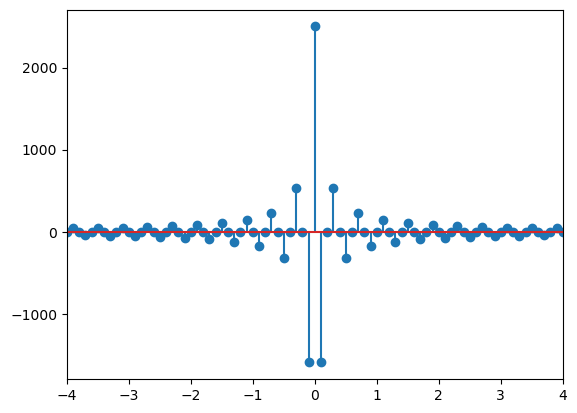

In [8]:
N = 5000 # Number of sampling steps <- specifies how long we look at the signal.
T = 1.0/500 # Sampling frequency <- specifies how many times we sample per second.

x = np.linspace(0.0,N*T,N)
y = np.zeros_like(x)
y[int(len(y) * 1/4) : int(len(y) * 3/4)] = 1

### add code for fouriertransform here ###
### hint: for better visualization, you need to limit the x-axis to around 
yf = np.fft.fft(y)
yf = np.fft.fftshift(yf)

xf = np.fft.fftfreq(N,T)
xf = np.fft.fftshift(xf)
plt.stem(xf,yf)
plt.xlim(-4,4)

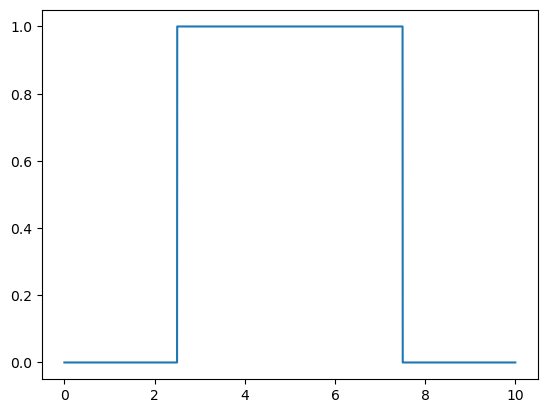

In [9]:
plt.plot(x,y)

To b) A continuous function in the time domain like the cosine function always has a discrete spectrum. In contrast, discrete functions in the time domain always have a continuous spectrum.

# Task 2, 2D Fourier transform

a) Use the make_grating function and create a 2D representation of a sine wave. Plot this sine wave and calculate the 2D Fourier transform. To calculate the Fourier transform, you will need the **[ifftshift()](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifftshift.html)**, **[fft2()](https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html)**, and **[fftfftshift()](https://numpy.org/doc/stable/reference/generated/numpy.fft.fftshift.html)** functions (in that order) of numpy's fft module. Use the absolute value of the spectrum to display. Experiment with the wavelength and angle of the oscillation. What do you see?

In [10]:
def gray_img(img):
    return np.uint8(img[:,:,0]/3 + img[:,:,1]/3 + img[:,:,2]/3)

def make_grating(wavelength:int=200,angle:float = 0.):
    '''
    function which computes sinosodial gratings
    
    parameters:
    
    wavelength = int, wavelength of grating
    angle = float, angle in radians, calculated as pi * angle
    
    returns:
    array with grating
    '''
    x = np.arange(-500,501,1)
    X, Y = np.meshgrid(x, x)
    
    angle = np.pi * angle
    grating = np.sin(
        2*np.pi*(X*np.cos(angle) + Y*np.sin(angle)) / wavelength
    )
    
    return grating

def make_block(noise: bool = False):
    
    block = np.zeros((1000,1000))
    block[250:750,250:750] = 1
    
    if noise:
        
        mean = 0
        var = 0.1
        sigma = var ** 0.5

        block = block + np.random.normal(mean,sigma,block.shape)
    
    return block

(480.0, 520.0)

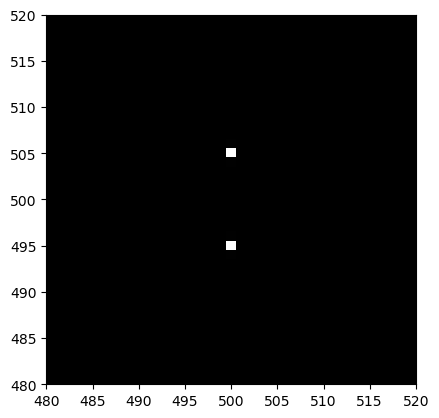

In [20]:
X = make_grating(angle=1/2)

### add code here ###
### hint: for better visualization, you need to limit the x-axis and y-axis to around ~480 to 520
yf = np.fft.ifftshift(X)
yf = np.fft.fft2(yf)
yf = np.fft.fftshift(yf)


plt.imshow(np.abs(yf), cmap='gray')
plt.xlim(480,520)
plt.ylim(480,520)   


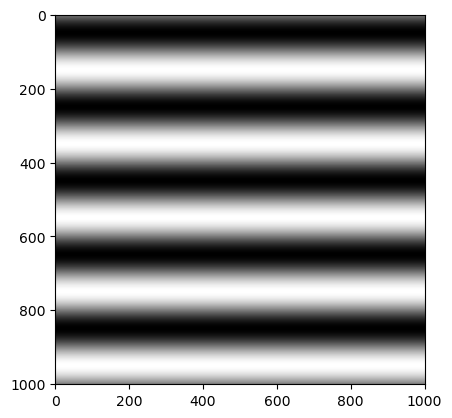

In [21]:
plt.imshow(X, cmap='gray')

b) Use the function make_block to create a 2D representation of a rectangular function. Calculate the spectrum for this function as well and plot the representations in image and frequency space against each other. What relationship do you notice when looking at the spectra of the 1D signals and their two-dimensional counterparts?

(480.0, 520.0)

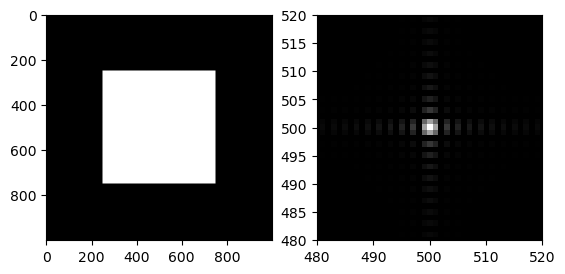

In [26]:
X = make_block()
# add code here
### hint: for better visualization, you need to limit the x-axis and y-axis to around ~480 to 520
yf = np.fft.ifftshift(X)
yf = np.fft.fft2(yf)
yf = np.fft.fftshift(yf)
fig, ax = plt.subplots(1,2)
ax[0].imshow(X, cmap='gray')

ax[1].imshow(np.abs(yf), cmap='gray')
ax[1].set_xlim(480,520)
ax[1].set_ylim(480,520)   

b) Add two different oscillations and look at the result.

(480.0, 520.0)

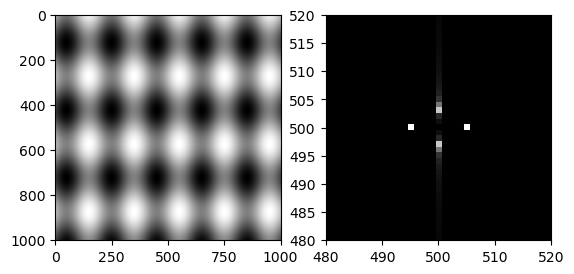

In [27]:
X = make_grating(200) + make_grating(300,1/2)

### add code here ###
### hint: for better visualization, you need to limit the x-axis and y-axis to around ~480 to 520
yf = np.fft.ifftshift(X)
yf = np.fft.fft2(yf)
yf = np.fft.fftshift(yf)
fig, ax = plt.subplots(1,2)
ax[0].imshow(X, cmap='gray')

ax[1].imshow(np.abs(yf), cmap='gray')
ax[1].set_xlim(480,520)
ax[1].set_ylim(480,520)   

c) Calculate the inverse Fourier transform of the oscillation from the last task. Plot the inverse and frequency space representations against each other. To do this, look at the function **[numpy.fft.ifft](https://numpy.org/doc/stable/reference/generated/numpy.fft.ifft.html)**. Remember that you need to use the **ifftshift** and **fftshift** functions here as well. Show the real part (.real) of the inverted ocillation.

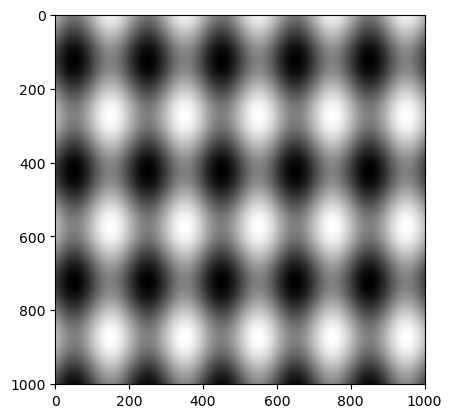

In [30]:
### add code here ###
### hint: for better visualization, you need to limit the x-axis and y-axis to around ~480 to 520
### hint: only return the real part of the inverse fourier transform

ift = np.fft.ifftshift(yf)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)

plt.imshow(ift.real, cmap='gray')

# Task 3, Filtering in the frequency domain

a) Use the function make_block and set the parameter *noise = True* to create a noisy 2D rectangular pulse. Write a function filt_img() which gets the frequency space representation of this image and filters it by setting the coefficients of high frequencies to zero.
For filtering, it is convenient to compute a binary mask of the same size as the frequency representation of the image and multiply the frequency representation by it.
Vary the number of coefficients which are not set to zero. Create a plot similar to the example:

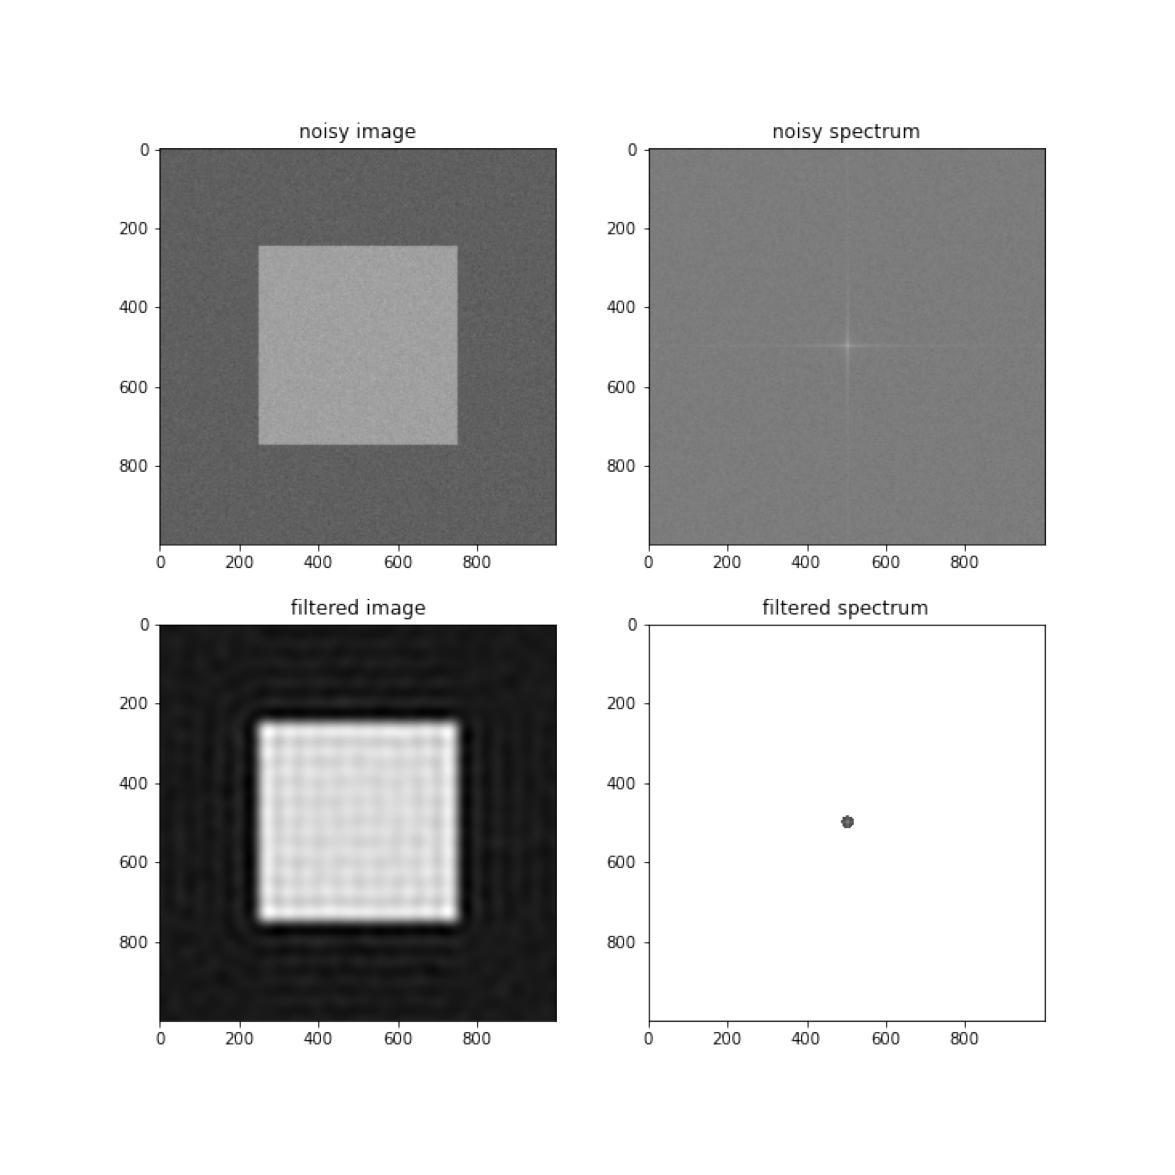

In [15]:
X = make_block()

#### display example ####
fig,ax = plt.subplots(1,1, figsize = (15,15))
ax.imshow(plt.imread('example.png'))
ax.axis('off')
plt.show()

In [16]:
## code for filtering image ###

In [17]:
X = make_block(noise=True)

### calculate spectrum of X ###


### filter XF and calculate inverese fourier transform ###





### show results ###

b) Add a parameter *mode* to your filt_img function which allows you to switch between high and low pass filtering. Then use your function to high-pass filter the noisy square wave signal. Create a plot as above.

In [18]:
X = make_block(noise=True)

### calculate spectrum of X ###


### filter XF and calculate inverese fourier transform, use mode to switch between low and high pass filtering ###



### show results ###

c) Load the image lnea.tif and calculate the gray value representation of this image (continue the calculation with a 1D matrix). Use your filter function to low-pass filter the image. Reconstruct the image selectively from as few coefficients as possible (<60). What do you notice?

In [19]:
X = plt.imread('lena.tif')

### add code here ###

# Task 4, jpg compression

Use the **[imwrite](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html)** function of opencv to save different versions of lena with different quantiles: cv2.imwrite('lena_10.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), quantile]). Vary the value for quantile and see the results.